You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

# Your mission

You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import helper_functions as hf

CURDIR = os.getcwd()
DATADIR = os.path.join(CURDIR,  "data")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Exploration and analysis

In this section, you are to explore the data. You are to fulfill the following tasks:
- **Univariate analysis**
    - study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity 
    - **Tips**: you can analyse ACF, PACF plots, perform Augmented Dickey-Fuller test
- **Multivariate analysis**
    - study other blockchain variables, retrieve insights
    - study the correlation between the Bitcoin market price and other blockchain variables 
    - **Tips**: Pearson correlation

In [ ]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), 
                            delimiter=",")


In [ ]:
df_blockchain.head()

,Date,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
0,2011-09-13,6.88,45.908451,0.0,12.018816,1.777774e+06,52318.011503,0.0,592.190091,0.019009,...,7.666766,12622.0,6519.0,1497195.0,6519.0,358543.612114,58615.641320,403275.612279,7.257416e+06,5.022014e+07
1,2011-09-14,6.19,42.465753,0.0,13.263925,1.755425e+06,48306.468911,0.0,594.907367,0.018007,...,7.369408,12408.0,6200.0,1503780.0,6200.0,302619.024544,74521.484625,461287.989830,7.264662e+06,4.540930e+07
2,2011-09-15,5.92,41.500000,0.0,12.914875,1.755425e+06,60431.444952,0.0,597.554226,0.018240,...,7.333913,12988.0,6474.0,1509972.0,6474.0,299226.130646,79422.402932,470180.625359,7.272284e+06,4.322228e+07
3,2011-09-16,5.58,52.176471,0.0,10.995096,1.755425e+06,34345.021913,0.0,600.362512,0.022136,...,5.466341,12059.0,6209.0,1516381.0,6209.0,674606.861338,82696.853247,461448.441118,7.279040e+06,4.088136e+07
4,2011-09-17,5.18,40.701493,0.0,10.733308,1.755425e+06,36805.913687,0.0,602.995510,0.017116,...,6.489054,10988.0,5454.0,1522600.0,5454.0,354198.945778,68238.166521,353473.702578,7.285375e+06,3.801833e+07


In [ ]:
df_blockchain.columns.sort_values().shape

(23,)

## Autocorrelaiton and Partial correlation

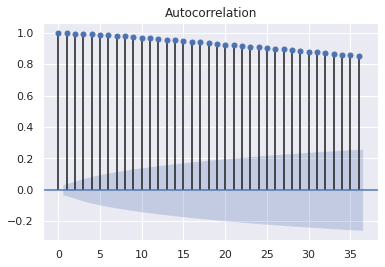

In [ ]:
plot_acf(df_blockchain["market-price"]);

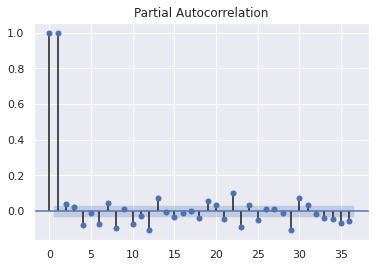

In [ ]:
plot_pacf(df_blockchain["market-price"]);

## Multivariate analysis

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_blockchain, title='Bitcoin', html={'style':{'full_width':True}})
profile

## Univariate analysis study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity

In [ ]:
df_marketprice=df_blockchain[['Date','market-price']]
df_marketprice['market-price']=np.log(df_marketprice['market-price'])

In [ ]:
df_marketprice['Date']=pd.to_datetime(df_marketprice['Date'])

In [ ]:
df_marketprice.isnull().sum()

In [ ]:
df_marketprice=df_marketprice.set_index('Date')

In [ ]:
df_marketprice.plot(grid=True,title='log market-price')

### Seasonality

#### Seasonality on a year

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2020,1,1)
end_date=datetime(2021,1,1)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one year',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2019,1,1)
end_date=datetime(2020,1,1)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one year',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2018,1,1)
end_date=datetime(2019,1,1)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one year',grid=True)

We don't observe any seasonality per year. We need to look if there is seasonality per month.

#### Seasonality per month

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,1)
end_date=datetime(2021,2,1)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one MONTH',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,2,1)
end_date=datetime(2021,3,1)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one month',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,3,1)
end_date=datetime(2021,4,1)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one month',grid=True)

We need to look for seasonality per week because there is no stationnarity per month.

#### Seasonality per week

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,1)
end_date=datetime(2021,1,7)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one week',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,8)
end_date=datetime(2021,1,15)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one week',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,16)
end_date=datetime(2021,1,23)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over one week',grid=True)

There is no stationarity. We need to look for seasonality on a four days periods.

#### Seasonality on a four days period

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,1)
end_date=datetime(2021,1,5)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over 4-day period',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,6)
end_date=datetime(2021,1,10)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over 4-day period',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,11)
end_date=datetime(2021,1,15)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over 4-day period',grid=True)

In [ ]:
matplotlib.rcParams['figure.figsize']=[12.0,8.0]
from datetime import datetime
start_date=datetime(2021,1,16)
end_date=datetime(2021,1,20)
df_marketprice[(start_date<=df_marketprice.index) & (df_marketprice.index<=end_date)].plot(title='log-price over 4-day period',grid=True)

In [ ]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df_marketprice.iloc[3440:3510,:],model='additive')
fig=decomposition.plot()
matplotlib.rcParams['figure.figsize']=[9.0, 5.0]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(df_marketprice.index, df_marketprice['market-price'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [ ]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(df_marketprice,model='multiplicative')
fig=decomposition.plot()
matplotlib.rcParams['figure.figsize']=[9.0, 5.0]

In [ ]:
seasonality=decomposition.seasonal
seasonality.plot(color='green')

To conclude, we don't observe seasonality on Bitcoin. Since the market of Bitcoin is always open, it is coherent.

### Stationnarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df_marketprice['market-price'])

0,6>>0,05 thus the time series is not stationnary ( what we can see from the graph )

## Rolling mean

In [ ]:
rolling_mean = df_marketprice.rolling(window = 30).mean()
df_marketprice['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
df_marketprice['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
df_marketprice.plot(title='original')

In [ ]:
df_marketprice=df_marketprice.dropna()

In [ ]:
adfuller(df_marketprice['rolling_mean_diff'])

In [ ]:
model=sm.tsa.statespace.SARIMAX(df_marketprice['rolling_mean_diff'],order=(1, 1, 1),seasonal_order=(1,1,1,30))
results=model.fit()

In [ ]:
df_marketprice['forecast']=results.predict(start=3400,end=3544,dynamic=True)
df_marketprice[['rolling_mean_diff','forecast']].plot(figsize=(12,8))

## Train test split

In [ ]:
X_train, X_test = hf.data_split(df_blockchain)

,Date,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
0,2011-09-13,6.88,45.908451,0.000000,1.201882e+01,1.777774e+06,5.231801e+04,0.000000e+00,592.190091,0.019009,...,7.666766,12622.0,6519.0,1497195.0,6519.0,3.585436e+05,58615.641320,4.032756e+05,7.257416e+06,5.022014e+07
1,2011-09-14,6.19,42.465753,0.000000,1.326393e+01,1.755425e+06,4.830647e+04,0.000000e+00,594.907367,0.018007,...,7.369408,12408.0,6200.0,1503780.0,6200.0,3.026190e+05,74521.484625,4.612880e+05,7.264662e+06,4.540930e+07
2,2011-09-15,5.92,41.500000,0.000000,1.291487e+01,1.755425e+06,6.043144e+04,0.000000e+00,597.554226,0.018240,...,7.333913,12988.0,6474.0,1509972.0,6474.0,2.992261e+05,79422.402932,4.701806e+05,7.272284e+06,4.322228e+07
3,2011-09-16,5.58,52.176471,0.000000,1.099510e+01,1.755425e+06,3.434502e+04,0.000000e+00,600.362512,0.022136,...,5.466341,12059.0,6209.0,1516381.0,6209.0,6.746069e+05,82696.853247,4.614484e+05,7.279040e+06,4.088136e+07
4,2011-09-17,5.18,40.701493,0.000000,1.073331e+01,1.755425e+06,3.680591e+04,0.000000e+00,602.995510,0.017116,...,6.489054,10988.0,5454.0,1522600.0,5454.0,3.541989e+05,68238.166521,3.534737e+05,7.285375e+06,3.801833e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509,2021-04-22,53808.80,1920.349650,10.666667,1.676341e+08,2.358198e+13,6.429395e+07,6.294209e+08,340456.355086,1.276191,...,234.128229,757844.0,274610.0,635849023.0,269592.0,2.189518e+06,157972.362817,8.500130e+09,1.868829e+07,1.011151e+12
3510,2021-04-23,51731.71,2190.600000,12.100000,1.582560e+08,2.358198e+13,5.556738e+07,1.187406e+09,340638.819333,1.315820,...,187.898411,794322.0,295731.0,636123674.0,290057.0,2.184878e+06,230771.360532,1.148612e+10,1.868916e+07,9.350666e+11
3511,2021-04-24,51153.13,2004.758621,13.200000,1.699787e+08,2.358198e+13,5.387773e+07,1.413848e+09,340816.370766,1.326226,...,185.344294,695216.0,290690.0,636418250.0,285889.0,1.601340e+06,78195.467366,3.907764e+09,1.869003e+07,9.373611e+11
3512,2021-04-25,50110.53,1709.510638,12.000000,1.652896e+08,2.358198e+13,4.945331e+07,4.582743e+08,341008.684802,1.342451,...,205.165565,585806.0,241041.0,636708684.0,236534.0,1.637220e+06,114196.701243,5.690337e+09,1.869093e+07,9.308049e+11


# ARIMA


## Modeling
The following code allows ARIMA modeling with one combination of (p,d,q).

In [ ]:
parameters = (2,1,1)
errors, predictions = hf.evaluate_arima_model(X_train["market-price"], 
                                              X_test["market-price"], parameters )
errors

NotImplementedError: ignored

## Search for the best ARIMA model
We use grid search to search for the best ARIMA parameters that gives the lowest error. This follows the Box-Jenkins methology.

In [ ]:
best_cfg, best_score = hf.arima_grid_search(X_train["market-price"], 
                                            X_test["market-price"],
                                            np.arange(1,3), np.arange(3), np.arange(3))

In [ ]:
parameters = best_cfg
errors, predictions = hf.evaluate_arima_model(X_train["market-price"], 
                                              X_test["market-price"], parameters )


In [ ]:
parameters

## Visualization
To have a better view on the difference between true and predict values, we visualize them by plotting both the signals.

In [ ]:
# prepare the dataset for plotting
predict_date = df_blockchain.iloc[-30::]["Date"]
df_predict = pd.DataFrame(zip(predict_date,predictions,X_test["market-price"].values),
                          columns=["date", "predict", "true"])
df_predict

In [ ]:
df=df_predict
rmse_score = np.sqrt(np.square(np.subtract(df['predict'], df['true'])).mean())
print("rmse score : ", rmse_score)
df.shape

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="green",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("dotted")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, len(new_ticks), freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title(f"Model ARIMA{parameters}")
sns.despine()
plt.legend()
plt.tight_layout()


# ARIMAX

We will look at the influence of some exogenous variables like miners-revenue and difficulty on the market-price.

We fit the data with best parameters (1,1,2) as ARIMA model showed but we add exogenous regressors.

In [7]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/EI time series')

ValueError: ignored

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

CURDIR = os.getcwd()
DATADIR = os.path.join(CURDIR,  "data")
%matplotlib inline

In [9]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"),  delimiter=",")


FileNotFoundError: ignored

## Preparing data

In [ ]:
index_with_nan = df_blockchain.index[df_blockchain.isnull().any(axis=1)]
df_blockchain.drop(index_with_nan,0, inplace=True)
dataset=df_blockchain

In [ ]:
data=df_blockchain
data.Date = pd.to_datetime(data.Date, format='%Y/%m/%d')

In [ ]:
def norm(col):
  return (col-col.min())/(col.max()-col.min())

In [ ]:
max_price,min_price=data['market-price'].max(),data['market-price'].min()
max_price,min_price

In [ ]:
data['price']=norm(data['price'])
data['miners-revenue']=norm(data['miners-revenue'])
data['cap']=norm(data['cap'])
data['hash-rate']=norm(data['hash-rate'])
data['v']=norm(data['v'])

## Analyse exogenous features

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('miners.revenue')
ax2.title.set_text('capitalization')
ax3.title.set_text('hash-rate')
ax4.title.set_text('v')
data['price'].plot(ax=ax1, label='market-price')
data['price'].plot(ax=ax2, label='market-price')
data['price'].plot(ax=ax3, label='market-price')
data['price'].plot(ax=ax4, label='market-price')
data['miners-revenue'].plot(ax=ax1, label='miners-revenue')
data['cap'].plot(ax=ax2, label='cap')
data['hash-rate'].plot(ax=ax3, label='hash-rate')
data['v'].plot(ax=ax4, label='v')

plt.show()

Miners-revenue and Difficulty seem to be relevant exogenous data that will disturb less ARIMA simple model.

We are expecting to have mode accuracy when considering their influence

## ARIMAX modeling with pyflux

In [1]:
!pip install git+https://github.com/RJT1990/pyflux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-zxn5fu5t
  Running command git clone -q https://github.com/RJT1990/pyflux /tmp/pip-req-build-zxn5fu5t
     |████████████████████████████████| 99 kB 7.6 MB/s 
     |████████████████████████████████| 189 kB 58.1 MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.17-cp37-cp37m-linux_x86_64.whl size=5244470 sha256=e6c54dc1d2b98e07a714ff4a05ba6719d9913e59ede129ffe583cbeba36337fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxu4y_3s/wheels/96/8f/9c/4523f6aab114103428254ec8f7260d52bffaa1ea1add77a487
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=aaa22abf32f0e36261bc0d15f712e6ed81ab6f245e2b7338f402b00a9a6eee5a
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built pyflux algopy


In [2]:
import pyflux as pf

In [ ]:
data=data[['Date','price','miners-revenue','cap','v']]


In [ ]:
dataset.rename(columns={'market-price': 'price', 'miners-revenue':'mrevenue', 'hash-rate': 'hashrate',
                           'total-bitcoins': 'total','market-cap':'cap'}, inplace=True)
dataset['v']=dataset['cap']/dataset['total']


In [ ]:
def norm(col):
  return (col-col.min())/(col.max()-col.min())

In [ ]:
dataset['price']=norm(dataset['price'])

In [ ]:
X_train, X_test = hf.data_split(dataset)

In [ ]:
model = pf.ARIMAX(data=X_train[-1500:], formula = "price~1+mrevenue-difficulty" ,  ar=1,integ=1, ma=2, family=pf.Normal())
x = model.fit("MLE")
x.summary()

In [ ]:
model.plot_fit(figsize=(15,10))

In [ ]:
pred=model.predict(h=30,oos_data=X_train,intervals=False)

In [ ]:
rmse_score = np.sqrt(np.square(np.subtract(pred,dataset[-30:][['price']] )).mean())
print("rmse score : ", rmse_score)

In [ ]:
plt.plot(dataset[-30:]['price'],label='True value')
plt.plot(pred,label='predictions')
plt.legend()
plt.show()

In [ ]:
model.plot_predict(h=30, oos_data=dataset[-100:], past_values=100, figsize=(15,5))

## Recursive autoregressive forecasting with exogenous variables using random forest

In [ ]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [ ]:
!pip install skforecast

In [ ]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), 
                            delimiter=",")

### Split data into train-test

In [ ]:
steps = 30
data_train = data[:-steps]
data_test  = data[-steps:]

### Create and train forecaster

In [ ]:
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),lags=2)
forecaster.fit(y=data_train['price'], exog=data_train['miners-revenue'])
forecaster

In [ ]:
def denorm(col):
  return col*(max_price-min_price)+min_price

### Test error

In [ ]:
error_mse = mean_squared_error(
                y_true = data_test['price'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

### Hyperparameter tuning

In [ ]:
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

lags_grid = [5, 12, 20]

param_grid = {'n_estimators': [50, 100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = data_train['price'],
                        exog        = data_train['miners-revenue'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = steps,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        return_best = True,
                        verbose     = False
               )

In [ ]:
# Grid Search results
# ==============================================================================
results_grid.head()

### Visualization

In [ ]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=40, exog=data['miners-revenue'][-90:])

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['price'][-90:].plot(ax=ax, label='train')
data_test['price'].plot(ax=ax, label='test')
predictions[-30:].plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(y_true = denorm(data_test['price']), y_pred = denorm(predictions[-30:]))
print(f"Test error (mse) {error_mse}")

After very long computation time, it is disappointing to see that this fitting method is not a good option for our data

# SARIMA

In the dataset there is no appearent seasonality, but we try to fit SARIMA model to look at the AICs indicators and be sure that SARIMA isn't relevant as a model







In [ ]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
p = range(1,2)
q = range(2,3)
pdq = list(itertools.product(p, [1], q))
sp = sq = range(1,8)#range(0,1) <- ARIMAX
seasonal_pdq = list(itertools.product(sp, [1,1], sq,[1]))#rlist(itertools.product(sp, [0], sq,[0]))<- ARIMAX
seasonal_pdq=list(set(seasonal_pdq))
seasonal_pdq

In [ ]:
from sklearn.metrics import mean_squared_error
params = []
params_s = []
aics = []
mses = []
cnt = 0
i=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
            i+=1
            print(i)    
            mod = sm.tsa.statespace.SARIMAX(X_train['market-price'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()
            

            pred = results.predict(start=3514, end =3544)

            params.append(param)
            params_s.append(param_seasonal)
            aics.append(results.aic)
            
            mses.append(mean_squared_error(X_test,pred[1:]))
            #if cnt % 8 == 0:
            print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param,
                                                            param_seasonal,
                                                            results.aic,
                                                        mses[-1]))
                #cnt += 1
print(aics)

In [ ]:
min_ind = aics.index(min(aics))
bestparam = (params[min_ind],params_s[min_ind])
print('best_param_aic:',bestparam,' aic:',min(aics))
mses



In [ ]:
bestparam = (params[min_ind],params_s[min_ind])
print('best_param_aic:',bestparam,' aic:',min(aics))
min_ind = mses.index(min(mses))
bestparam = (params[min_ind],params_s[min_ind])
print('best_param_mse:',bestparam,' mse:',min(mses))

No seasonality, SARIMA is not a relevant model

AICs and RMSE indicators are not satisfying and parameters are not significant 



# CONCLUSION

ARIMA model was the best fitting model It is the simplest but gives relevant predictions and best statistical indicators as AIC and P-value